<a href="https://colab.research.google.com/github/Juanchp00/se-ales-y-sistemas/blob/master/taller_2_Juan_Jos%C3%A9_Chamorro_Paz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 1 Señales y sistémas 
Juan José Chamorro Paz
817513


#2.Representación generalizada
3. Encuentre el espectro cn ∈ C de la senal  $x(t) = u(t)$ a través de la representación generalizada  $$x(t) =\sum\limits_{n=-\infty}^\infty{C_nφ_n(t)}$$, para $φn(t) = e^{jnω_ot}$. Realice una simulacion en Python para $t ∈ [0, 2]$ y determine el error relativo para $n ∈ {0, ±1, ±2}$.


Text(0, 0.5, 'x(t)')

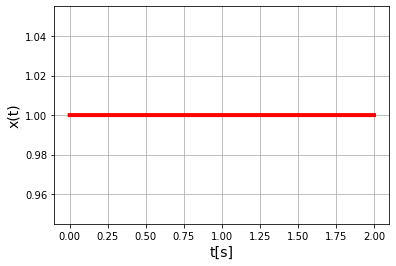

In [ ]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

T=2
Fs=1000
Nm = T*Fs
tv = np.linspace(0,T,Nm)

xo = np.heaviside(tv,1)

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)

In [ ]:
N = 2 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=2, min=-2), Output()), _dom_classes=('widget-int…

<function __main__.pltbase>

In [ ]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j)/(2*nv*np.pi))*((-1)**nv -1) 
Cn[N] = 1/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be

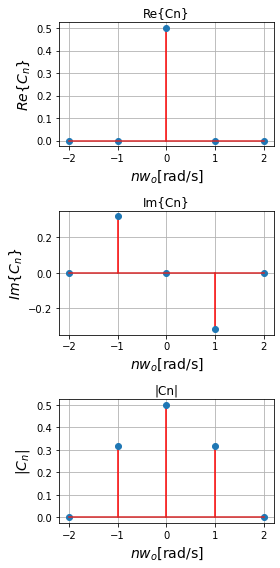

In [ ]:
fig = plt.figure(figsize=(4,8))
plt.subplot(3,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(3,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(3,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
Px = 1/2 # estimar según señal estudiada
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- (abs(Cn[N])**2 + 2*np.sum(abs(Cn[N:N+Na+1])**2))/Px
    xe = phin[:,ind]@ Cn[ind] 
    plt.plot(tv,xe,color='b',label='xe')
    plt.plot(tv,xo,color='r',label='x')
    plt.title('Er=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=2, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest>



#3. Serie de Fourier
Calcular los coeficientes de la serie compleja, trignométrica y compacta de Fourier para las siguientes funciones, con  t∈[−π,π] :
$$a)t, b)|sin(t)|, c)sgn(t), d)|cos^2(t/2)|, e)e^{jt/2}, f)t^2.$$ 
Para cada senal representada encuentre el error relativo para  n∈0,±1,±2,...,±5 . Implemente las simulaciones en Python para graficar la parte real del espectro, la parte imaginaria del espectro, la magnitud del espectro, la fase del espectro y la senal reconstruida.

Encuentre el espectro de Fourier, su magnitud y el error cuadratico medio de la representación para  n∈0,±1,±2,±3,±4,±5 , a partir de  x′′(t)  para la senal  x(t)  en la figura 1 . Compruebe el espectro obtenido con la estimacion a partir de  x(t)  mediante una simulación en Python.

In [ ]:
def serief(T,fs,xo,N,cn,co,bandera,px):

 Nm = T*Fs
 tv = np.arange(-T/2,T/2,T/Nm)
 xo = xo(tv)

 
 
 wo = 2*np.pi/T 
 print(Nm)
 phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)
 for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)
   

 nv = np.linspace(-N, N, 2*N+1) 
 Cn = cn(nv)
 Cn[N] = co
 if bandera == 1:
        Cn[N-1] = 0
        Cn[N+1] = 0
 if bandera == 2:
        Cn[N+1] = 1/2
       

 fig = plt.figure(figsize=(8,15))
 plt.subplot(6,1,1)  
 plt.plot(tv,xo,'r',linewidth=4)
 plt.grid()
 plt.xlabel("t[s]",fontsize = 14)
 plt.ylabel("x(t)",fontsize = 14)

 plt.subplot(6,1,2)
 plt.stem(nv, np.real(Cn), 'r')
 plt.title(r'Re{Cn}')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
 plt.axis('tight')
 plt.grid()

 plt.subplot(6,1,3)
 plt.stem(nv, np.imag(Cn), 'r')
 plt.title(r'Im{Cn}')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
 plt.axis('tight')
 plt.grid()

 plt.subplot(6,1,4)  
 plt.stem(nv, abs(Cn), 'r')
 plt.title(r'|Cn|')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$|C_n|$',fontsize = 14)
 plt.axis('tight')
 plt.grid()

 plt.subplot(6,1,5)  
 plt.stem(nv, np.arctan(np.imag(Cn)/np.real(Cn)), 'r')
 plt.title(r'|Cn|')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$Espectro$',fontsize = 14)
 plt.axis('tight')
 plt.grid()
 

 plt.subplot(6,1,6)  
 xe = phin @ Cn  
 plt.plot(tv,xe)
 plt.title("x^(t)")
 fig.tight_layout()
 Na = 10
 ind = range(N-Na,N+Na+1)
 er = 1 - (np.sum(abs(Cn)**2))/px
 
   
 xe = phin[:,ind] @ Cn[ind]
 plt.subplot(7,1,7)    
 plt.plot(tv,xe,color='b',label='xe')
 plt.plot(tv,xo,color='r',label='x')
 plt.plot(tv,xo-xe,color='g',label='Error')
 plt.title('Er=%.2f[%%]' % (100*er),fontsize=16)
 plt.xlabel('t[s]')
 plt.ylabel('x(t)')
 plt.grid()
 plt.legend()
 plt.show()

6283.185307179586


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/

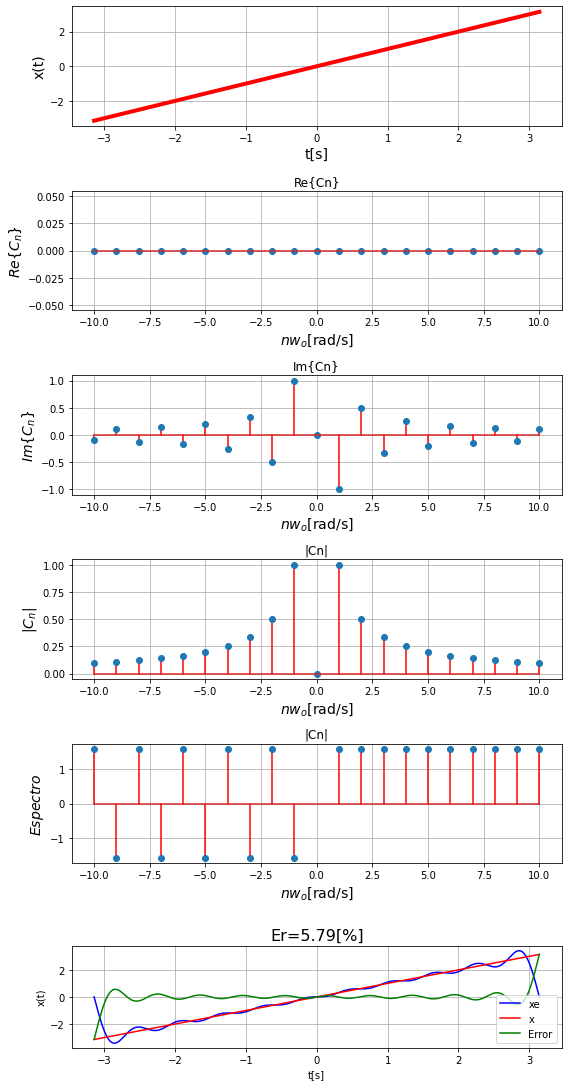

In [ ]:
#1)
#a) t
T = 2*np.pi
fs=1000
x = lambda t : t
N = 10
cn = lambda n : 1j*((-1)**n)/n
co = 0
px = (1/3)*(np.pi**2)
serief(T,fs,x,N,cn,co,0,px)

6283.185307179586


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dis

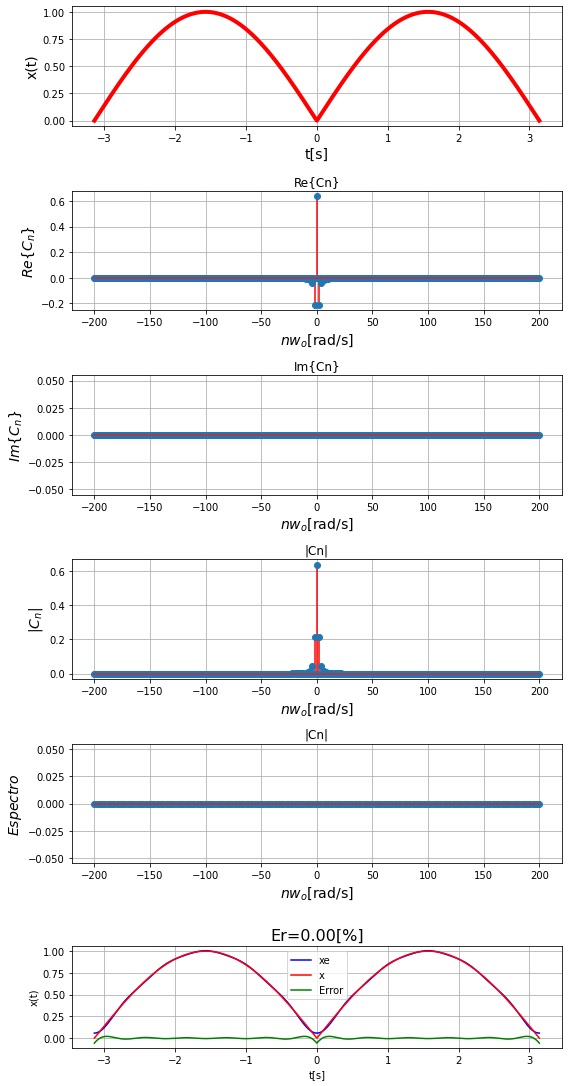

In [ ]:
#b) abs(sin(t))
T = 2*np.pi
fs=1000
x = lambda t : abs(np.sin(t))
N = 200
cn = lambda n : (1/np.pi)*(-((-1)**n/((n**2)-1))-1/((n**2)-1))
co = 2/np.pi
px = 1/2
serief(T,fs,x,N,cn,co,1,px)

6283.185307179586


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a Lin

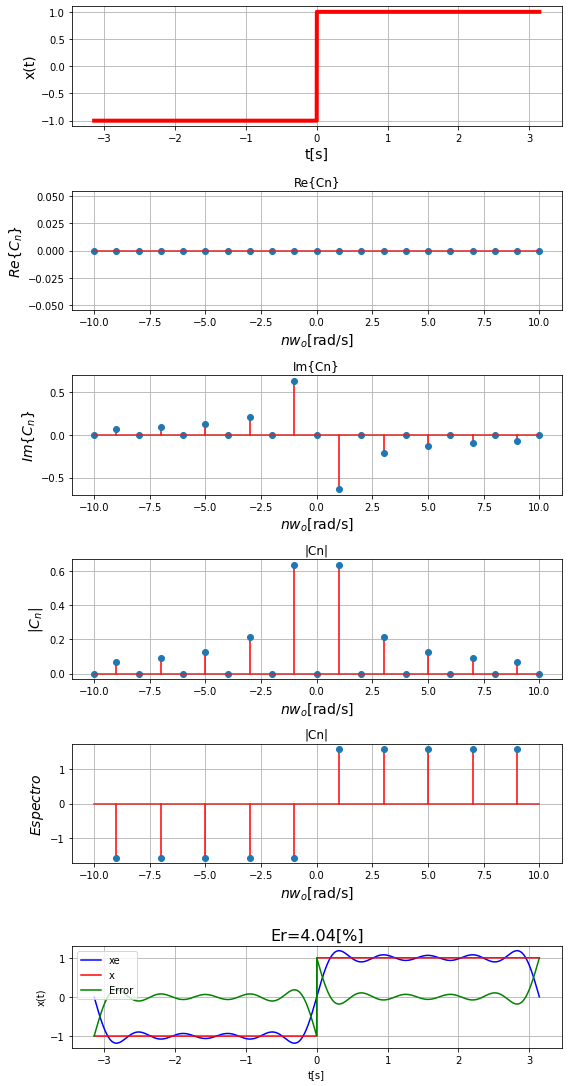

In [ ]:
#c) sgn(t)
T = 2*np.pi
fs=1000
x = lambda t : np.heaviside(t,1)  -np.heaviside(-t,-1)
N = 10
cn = lambda n : (1j/np.pi)*(((-1)**n) - 1)/n
co = 0
px = 0
serief(T,fs,x,N,cn,co,0,1)


6283.185307179586


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

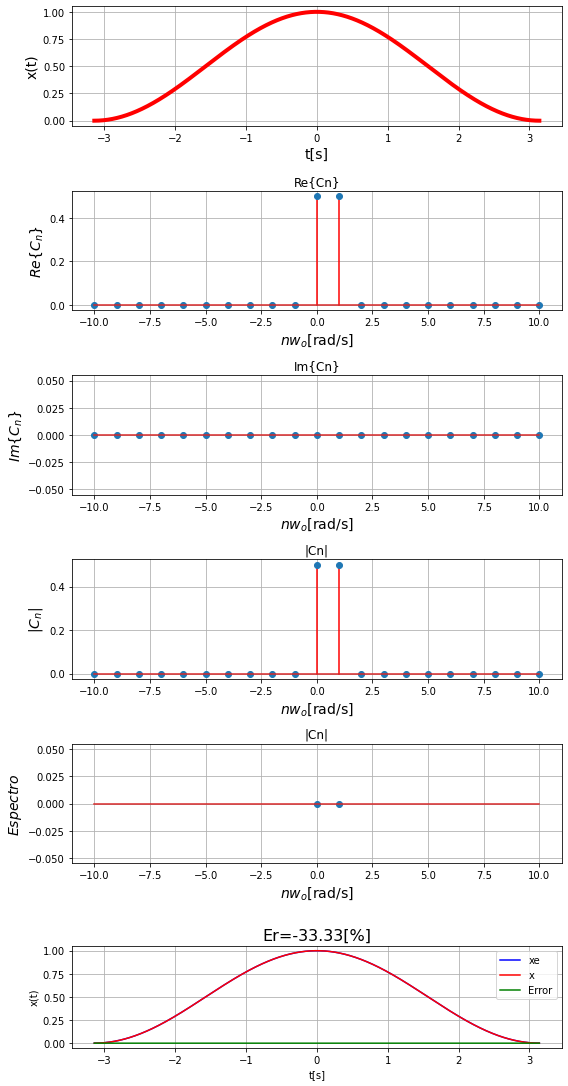

In [ ]:
#d) cos**2(t/2)
T = 2*np.pi
fs=1000
x = lambda t : np.cos(t/2)**2
N = 10
cn = lambda n : 0*n
co = 1/2
px = (3/8)
serief(T,fs,x,N,cn,co,2,px)

6283.185307179586


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: In Ma

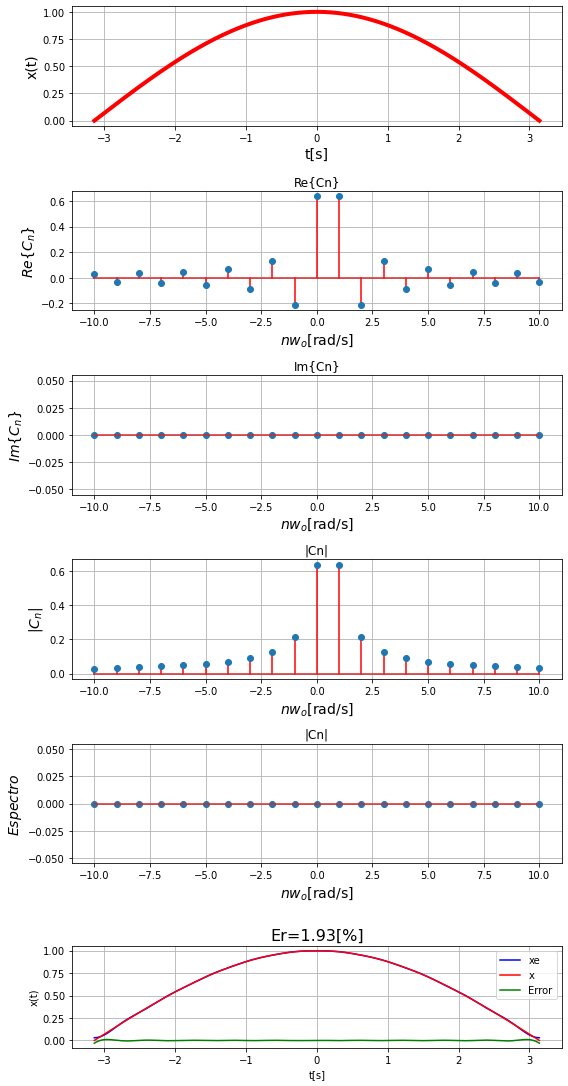

In [ ]:
#e) e**(jt/2)
T = 2*np.pi
fs=1000
x = lambda t :  np.exp(1j*t/2)
N = 10
cn = lambda n : (1/(np.pi*(1/2 - n)))*((-1)**n)
co = 2/np.pi
px=1
serief(T,fs,x,N,cn,co,0,px)

6283.185307179586


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a Li

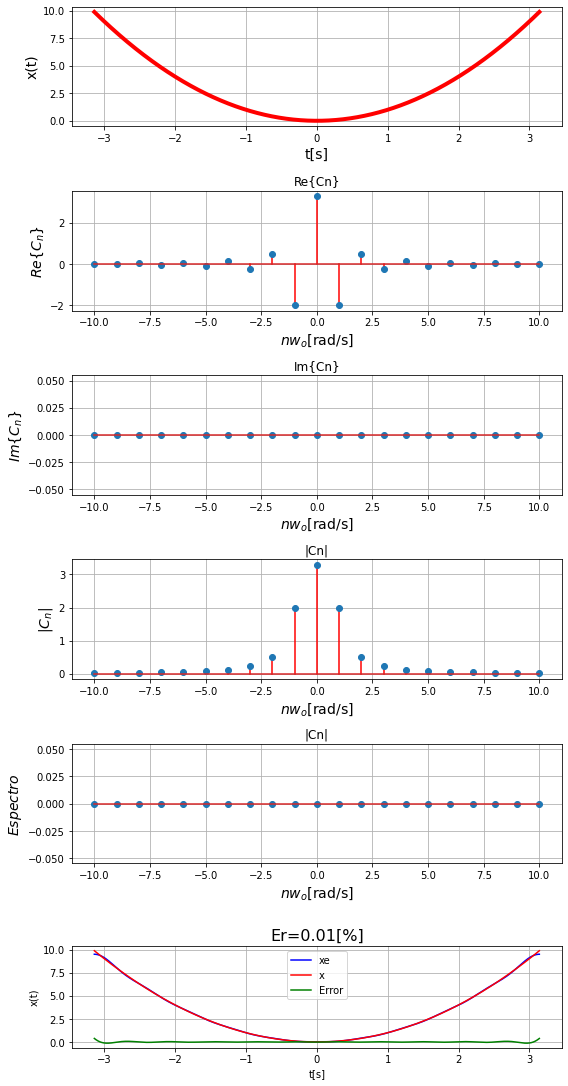

In [ ]:
#f)t**2
T = 2*np.pi
fs=1000
x = lambda t :  t**2
N = 10
cn = lambda n : (2/(n**2))*((-1)**n)
co = (np.pi**2)/3
px = (np.pi**4)/5
serief(T,fs,x,N,cn,co,0,px)

#4. Transformada de Fourier
1. Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta) y la transformada de Fourier. Considere las diferentes combinaciones entre: espectro continuo y discreto y senal en tiempo continuo y discreto. Ademas, consulte en qué consiste el algoritmo  ́"Fast Fourier Transform"(FFT) y su utilidad para el calculo de la transformada discreta de Fourier. Compruebe los resultados obtenidos en el punto 1 utilizando la FFT en Python.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def fft(T,Fs,xo):
 Nm = T*Fs
 tv = np.arange(-T/2,T/2,T/Nm)
 xo = xo(tv)
 plt.title("Señal Original")
 plt.plot(tv,xo,"b")
 plt.show()
 vf = np.fft.fftfreq(len(xo),1/Fs) 
 Xw = np.fft.fft(xo) 
 plt.stem(vf,abs(Xw),'r')
 plt.title(r'|X[n]|')
 plt.xlabel(r'$f$[Hz]',fontsize = 14)
 plt.ylabel(r'$|X[n]|$',fontsize = 14)
 plt.axis('tight')
 plt.grid()
 plt.show()
 plt.stem(vf,abs(Xw)/len(vf),'r')
 plt.title(r'|X[n]|/K=c_n')
 plt.xlabel(r'$f$[Hz]',fontsize = 14)
 plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
 plt.show()

 #la reconstrucción de x[k] se puede obtener mediante la transformada inversa
 xe = np.fft.ifft(Xw)
 plt.plot(tv,xe)
 plt.title(r'Reconstrucción completa')
 plt.xlabel(r't',fontsize = 14)
 plt.ylabel(r'$x[n]$',fontsize = 14)
 plt.show()
 ind = range(10,1000)
 Xwf = Xw.copy()
 Xwf[ind] = 0
 xe2 = np.fft.ifft(Xwf)
 plt.title(r'Señal ponderada')
 plt.plot(tv,xe2)
 plt.show()

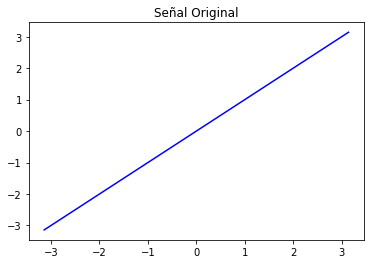

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


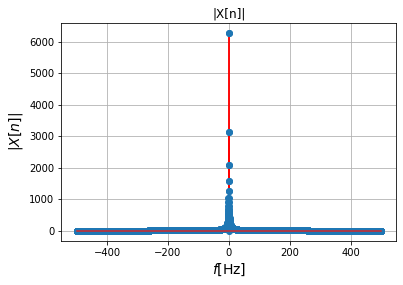

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


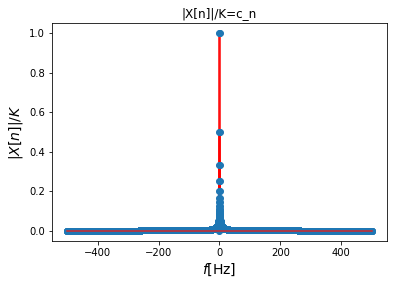

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


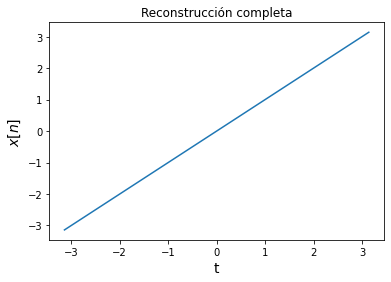

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


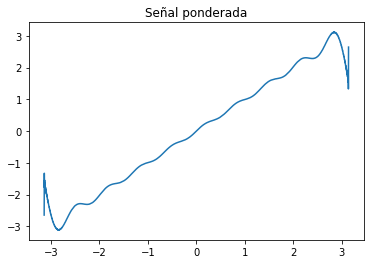

In [ ]:
#a) t
T = 2*np.pi
fs=1000
x= lambda t : t
fft(T,fs,x)

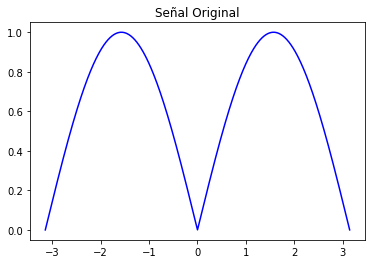

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


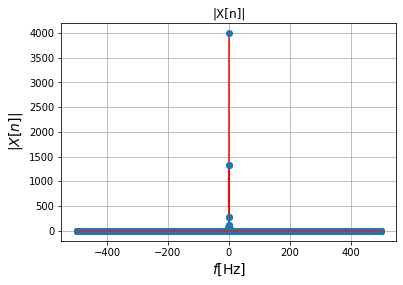

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


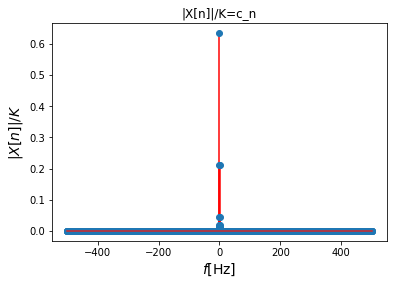

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


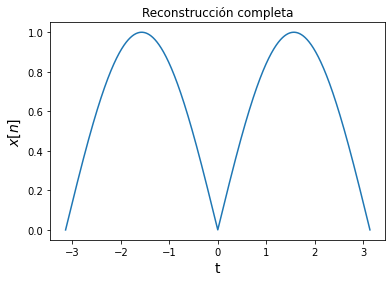

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


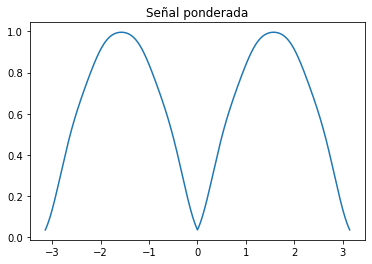

In [ ]:
#b) |sin(t)|
T = 2*np.pi
fs=1000
x = lambda t : abs(np.sin(t))
fft(T,fs,x)

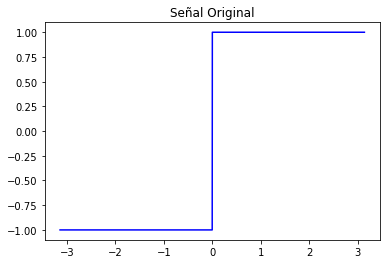

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


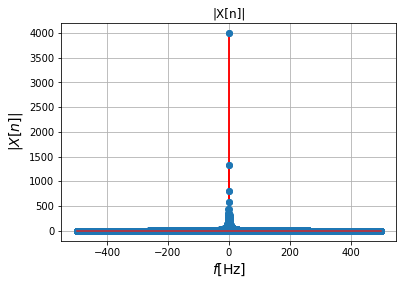

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


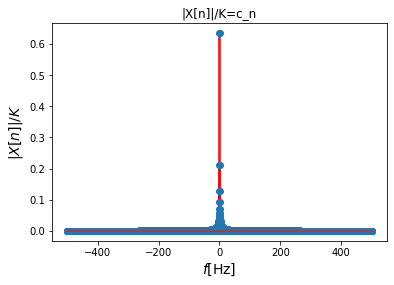

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


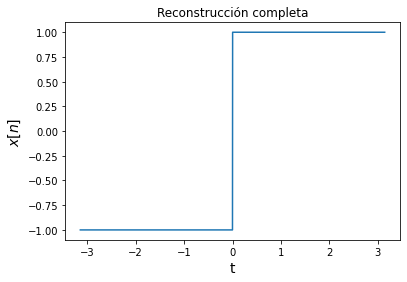

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


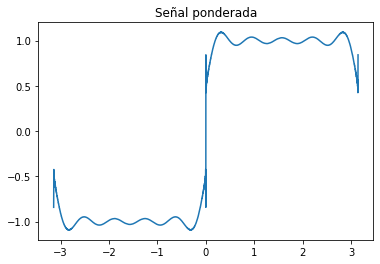

In [ ]:
#c) sgn(t)
T = 2*np.pi
fs=1000
x = lambda t : np.heaviside(t,1)  -np.heaviside(-t,-1)
fft(T,fs,x)

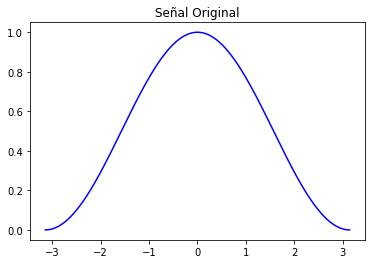

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


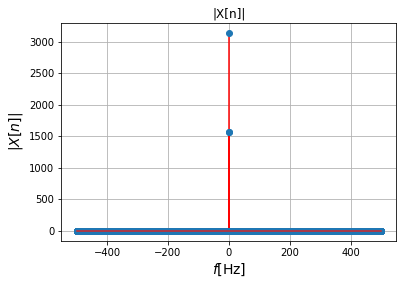

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


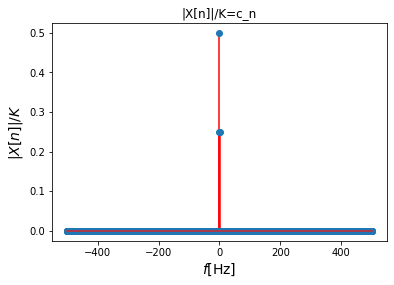

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


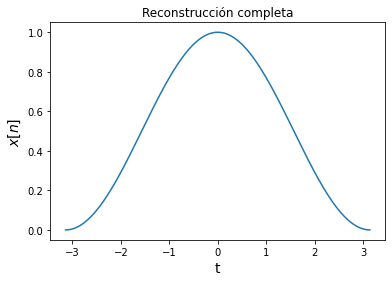

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


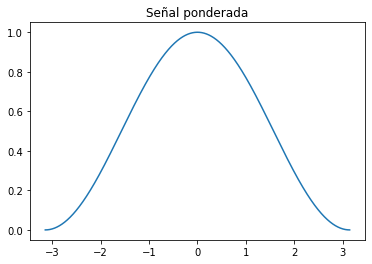

In [ ]:
#d) cos(t/2)**2
T = 2*np.pi
fs=1000
x = lambda t : np.cos(t/2)**2
fft(T,fs,x)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


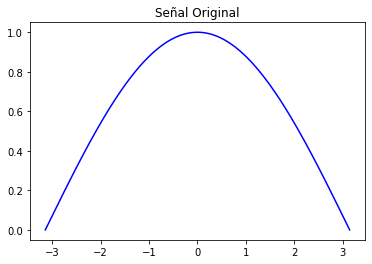

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


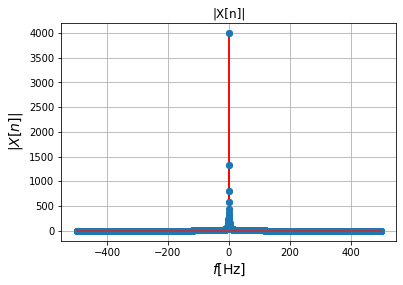

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


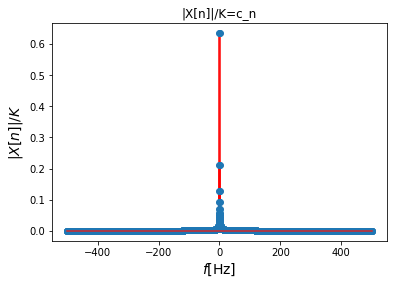

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


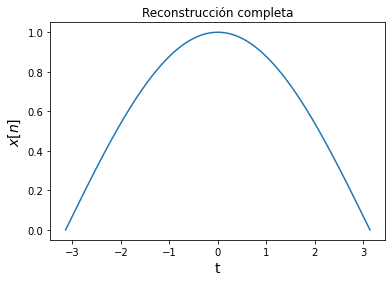

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


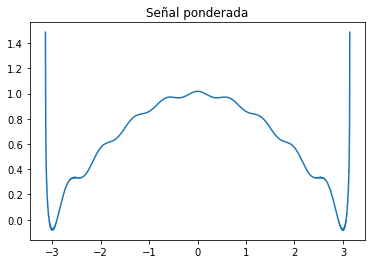

In [ ]:
#e) e**(jt/2)
T = 2*np.pi
fs=1000
x = lambda t : np.exp(1j*t/2)
fft(T,fs,x)

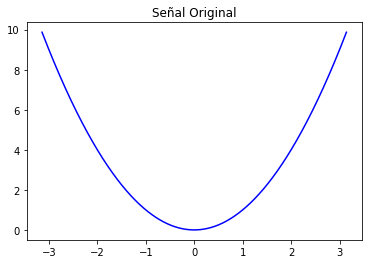

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


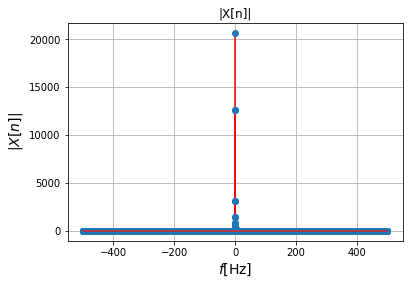

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


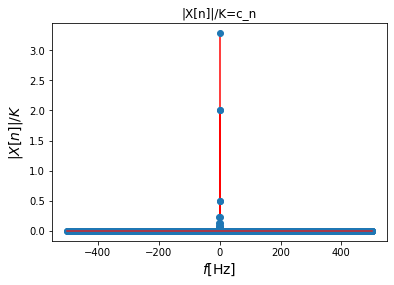

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


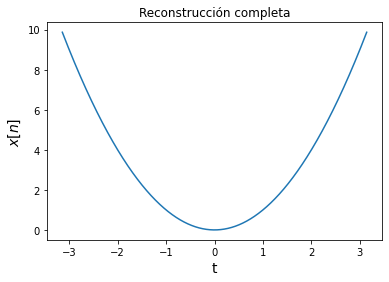

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


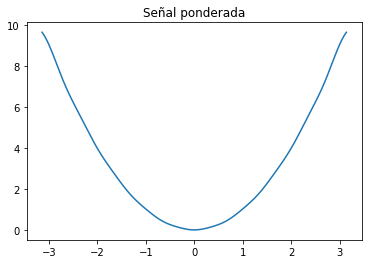

In [ ]:
#f) t**2
T = 2*np.pi
fs=1000
x = lambda t : t**2
fft(T,fs,x)